In [ ]:
import pandas as pd
import numpy as np
import os
file='./data/voynich.txt'

In [ ]:
#df = pd.read_csv(file,header=None, sep='\t',engine='python',names=['image','description'])
df = pd.read_csv(file,header=None,sep='>',names=['heading','text'])
# df[['image','did']] = df.image.str.split("#",expand=True,)


print(len(df))
df.head(3)

In [ ]:
df['heading'] = df.heading.str.replace('<','')
df['text'] = df.text.str.strip()
df.head(5)

In [ ]:
df[['page','paragraph','line']] = df.heading.str.split(".",expand=True)

In [ ]:
df['page']=df['page'].str.replace('f','')
df['text']=df['text'].str.replace('.',' ')
df['text']=df['text'].str.replace('=',' ')
df['text']=df['text'].str.replace('-','')

In [ ]:
data=df['text']

In [ ]:
data

In [ ]:
STOPWORDS=[]

In [ ]:
words=[]
for a in data:
    for w in a.split(" "):
        words.append(w)

word_df = pd.DataFrame(words,columns=['word'])
top = word_df.word.value_counts().head(20)
print(top)


In [ ]:
word_df['size']=word_df['word'].str.len()

In [ ]:
stops=word_df[word_df['size']<3]

In [ ]:
stops=stops['word']

In [ ]:
stops=set(stops)

In [ ]:
STOPWORDS=list(stops)

In [ ]:
all_text= ""
for a in words:
    all_text += a +" "

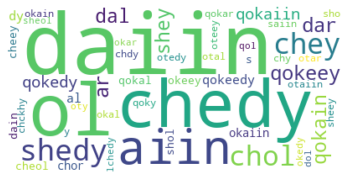

In [77]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", max_words=50,
               max_font_size=100, random_state=42)
output = wc.generate(all_text)
plt.figure()
plt.imshow(output,interpolation='bilinear')
plt.axis('off')
plt.show()


In [63]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in STOPWORDS]  
  
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans


In [ ]:
data

In [ ]:
n_grams=[]
for a in data:

    n_grams.append(generate_N_grams(a,2))


In [72]:
n_grams3=[]
for a in data:

    n_grams3.append(generate_N_grams(a,3))

In [66]:
n_gramlist=[]
for a in n_grams:
    for b in a:
        n_gramlist.append(b)

In [74]:
n_gram3list=[]
for a in n_grams3:
    for b in a:
        n_gram3list.append(b)

In [69]:
n_gramlist

n_gramlist_df = pd.DataFrame(n_gramlist,columns=['ngram'])
top = n_gramlist_df.ngram.value_counts().head(30)
print(top)

chol daiin         34
shedy qokedy       21
chedy qokeey       19
chol chol          19
qol chedy          19
chedy qokain       18
shedy qokaiin      18
qokeedy qokeedy    18
daiin daiin        17
shey qokain        17
shedy qokeedy      16
chedy qokedy       14
qokal shedy        14
chedy qol          14
qokain chedy       13
daiin chey         13
shedy qokeey       12
qokar shedy        12
qokedy qokeedy     12
qokal chedy        12
qokeey qokeey      12
chedy qokaiin      12
daiin dal          12
qokedy chedy       11
qokedy qokedy      11
shedy qokain       11
qokeedy qokedy     11
shedy qokal        10
qol shedy          10
qokaiin chedy      10
Name: ngram, dtype: int64


In [75]:
n_gram3list

n_gram3list_df = pd.DataFrame(n_gram3list,columns=['ngram'])
top = n_gram3list_df.ngram.value_counts().head(30)
print(top)

chey qol chedy            4
sheedy qokedy chedy       3
qokal shedy qokedy        3
chedy qokeey qokeey       3
shedy qokedy shedy        3
shedy qokedy qokeedy      3
qokedy qokeedy qokedy     2
chey dal shedy            2
chedy chol chedy          2
qotchdy qotar shedy       2
dar okal dal              2
chedy qokaiin otaiin      2
okedy okedy qokedy        2
qokal otal otam           2
daiin daiin ody           2
otedy shedy qokeedy       2
chor chol daiin           2
cthor chol chor           2
chol daiin chkaiin        2
dal chdy dal              2
aiin okal otal            2
qokar shedy qokain        2
otchy chol daiin          2
chedy qokain chckhy       2
dol shedy qokedy          2
qokedy qokeedy qokeedy    2
qokeedy qokeedy chedy     2
dor chol chy              2
shey okain chedy          2
otedy qokedy qokedy       2
Name: ngram, dtype: int64


In [70]:
n_gramlist=list(set(n_gramlist))

In [71]:
n_gramlist

['qooeel ckhal',
 'dain sho',
 'cheos sh*s',
 'qokeedy chokain',
 'qotain chcthd',
 'air otkchedy',
 'qokar cheol',
 'cheockay otyd',
 'soiin daiin',
 'shckhy oteal',
 'ysheo kaiin',
 'qokedy dain',
 'dar aimkcheo',
 'shor ykal',
 'okeed olkain',
 'lkaiin yteedy',
 'olchar shaiin',
 'oraiin shefchdy',
 'sdar sheqokam',
 'otedy teyteg',
 'otary olaiin',
 'poldshedy olkory',
 'shcthey okeol',
 'pchor aral',
 'cho okaiin',
 'tair cheol',
 'otalshedy q*teey',
 'dar shain',
 'cheor alkain',
 'kair otaiilody',
 'qokar oltar',
 'cholaiin oteeeo',
 'qolar shey',
 'daiin cheeodam',
 'cheedar qopchedy',
 'opshdy qolp',
 'pshodalos qokshdy',
 'dchey okey',
 'sheeolody alody',
 'shey qoly',
 'qodair okeey',
 'tolchdaiin chckhy',
 'oteey yteol',
 'chokshor okalal',
 'cheey keeol',
 'fcheshd teody',
 'qoky chcthy',
 'cheey qod',
 'dair aiin',
 'ckhy chor',
 'lkaiin otal',
 'raiin cheoar',
 'roiin okeedy',
 'qoar shor',
 'chokshor daiinokshody',
 'chdairod okchdy',
 'qoleechedy kecheokeo',
 'qotedy s

In [ ]:
def get_training_corpus():
    for i in range(0, len(df)):
        yield df.iloc[i : ]["text"]